In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PLOT1.csv to PLOT1.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['PLOT1.csv']))
df1 = pd.read_csv(io.BytesIO(uploaded['PLOT1.csv']))

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from fancyimpute import KNN
import warnings
import os
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


In [ ]:
df.head(50)

,AGE,BANGALORE(Y/N),CITY/STATE/COUNTRY,NRI / NON NRI,NO OF BOOKING,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,Unnamed: 17
0,41.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,181718.25000,YR_1,NaN,NaN,NaN,NaN,NaN,NaN
1,32.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14585.66667,YR_1,NaN,NaN,NaN,NaN,NaN,NaN
2,35.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14621.00000,YR_1,NaN,NaN,NaN,NaN,NaN,NaN
3,26.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,Hindu,General,OtherLIst,Hindi,Kayastha,NaN
4,NaN,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,NaN,NaN,NaN,NaN,NaN,NaN
5,66.0,Y,BANGALORE,NO,2,No,"PLOT,PLOT","Plot -,Plot -",Y,2,14588.00000,YR_1,OtherList,OtherList,OtherList,OtherLanguage,OtherList,NaN
6,32.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,NaN,NaN,NaN,NaN,NaN,NaN
7,29.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.00000,YR_1,NaN,NaN,NaN,NaN,NaN,NaN
8,37.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,Sikh,General,Punjabi,Punjabi,Punjabi,NaN
9,55.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.66667,YR_1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df = df.drop(['EMAIL ID 1','ADDRESS','Date Of Birth','Name','DATE OF BOOKING(3)','AREA','PINCODE'], axis=1)
df = df.drop(['Unnamed: 17'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 77 non-null     float64
 1   BANGALORE(Y/N)      80 non-null     object 
 2   CITY/STATE/COUNTRY  80 non-null     object 
 3   NRI / NON NRI       80 non-null     object 
 4   NO OF BOOKING       80 non-null     int64  
 5   multiple complex    80 non-null     object 
 6   FLAT/PLOT           80 non-null     object 
 7   TYPE OF FLAT        80 non-null     object 
 8   PLOT(Y/N)           80 non-null     object 
 9   NO OF PLOTS         80 non-null     int64  
 10  TOTAL UNIT COST     80 non-null     float64
 11  YEAR BUCKET         80 non-null     object 
 12  RELIGION SORTED     24 non-null     object 
 13  CATEGORY SORTED     24 non-null     object 
 14  CASTE SORTED        24 non-null     object 
 15  LANGUAGE            24 non-null     object 
 16  COMMUNITY 

In [ ]:
df['CITY/STATE/COUNTRY'] = df['CITY/STATE/COUNTRY'].astype('category')
df['BANGALORE(Y/N)'] = df['BANGALORE(Y/N)'].astype('category')
df['NRI / NON NRI'] = df['NRI / NON NRI'].astype('category')
#df['TYPE OF COMPLEX'] = df['TYPE OF COMPLEX'].astype('category')
df['multiple complex'] = df['multiple complex'].astype('category')
df['FLAT/PLOT'] = df['FLAT/PLOT'].astype('category')
df['TYPE OF FLAT'] = df['TYPE OF FLAT'].astype('category')
df['YEAR BUCKET'] = df['YEAR BUCKET'].astype('category')
df['RELIGION SORTED'] = df['RELIGION SORTED'].astype('category')
df['CATEGORY SORTED'] = df['CATEGORY SORTED'].astype('category')
df['CASTE SORTED'] = df['CASTE SORTED'].astype('category')
df['LANGUAGE'] = df['LANGUAGE'].astype('category')
df['COMMUNITY'] = df['COMMUNITY'].astype('category')
df['PLOT(Y/N)'] = df['PLOT(Y/N)'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AGE                 77 non-null     float64 
 1   BANGALORE(Y/N)      80 non-null     category
 2   CITY/STATE/COUNTRY  80 non-null     category
 3   NRI / NON NRI       80 non-null     category
 4   NO OF BOOKING       80 non-null     int64   
 5   multiple complex    80 non-null     category
 6   FLAT/PLOT           80 non-null     category
 7   TYPE OF FLAT        80 non-null     category
 8   PLOT(Y/N)           80 non-null     category
 9   NO OF PLOTS         80 non-null     int64   
 10  TOTAL UNIT COST     80 non-null     float64 
 11  YEAR BUCKET         80 non-null     category
 12  RELIGION SORTED     24 non-null     category
 13  CATEGORY SORTED     24 non-null     category
 14  CASTE SORTED        24 non-null     category
 15  LANGUAGE            24 non-null     catego

In [ ]:
df['CITY/STATE/COUNTRY'] = df['CITY/STATE/COUNTRY'].cat.codes
df['BANGALORE(Y/N)'] = df['BANGALORE(Y/N)'].cat.codes
df['NRI / NON NRI'] = df['NRI / NON NRI'].cat.codes
#df['TYPE OF COMPLEX'] = df['TYPE OF COMPLEX'].cat.codes
df['multiple complex'] = df['multiple complex'].cat.codes
df['FLAT/PLOT'] = df['FLAT/PLOT'].cat.codes
df['TYPE OF FLAT'] = df['TYPE OF FLAT'].cat.codes
df['YEAR BUCKET'] = df['YEAR BUCKET'].cat.codes
df['RELIGION SORTED'] = df['RELIGION SORTED'].cat.codes
df['CATEGORY SORTED'] = df['CATEGORY SORTED'].cat.codes
df['CASTE SORTED'] = df['CASTE SORTED'].cat.codes
df['LANGUAGE'] = df['LANGUAGE'].cat.codes
df['COMMUNITY'] = df['COMMUNITY'].cat.codes
df['PLOT(Y/N)'] = df['PLOT(Y/N)'].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 77 non-null     float64
 1   BANGALORE(Y/N)      80 non-null     int8   
 2   CITY/STATE/COUNTRY  80 non-null     int8   
 3   NRI / NON NRI       80 non-null     int8   
 4   NO OF BOOKING       80 non-null     int64  
 5   multiple complex    80 non-null     int8   
 6   FLAT/PLOT           80 non-null     int8   
 7   TYPE OF FLAT        80 non-null     int8   
 8   PLOT(Y/N)           80 non-null     int8   
 9   NO OF PLOTS         80 non-null     int64  
 10  TOTAL UNIT COST     80 non-null     float64
 11  YEAR BUCKET         80 non-null     int8   
 12  RELIGION SORTED     80 non-null     int8   
 13  CATEGORY SORTED     80 non-null     int8   
 14  CASTE SORTED        80 non-null     int8   
 15  LANGUAGE            80 non-null     int8   
 16  COMMUNITY 

In [ ]:
# lot of missing values... so use knn to predict the missing catergorical value with knn clasifier
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=3)
df_imputer = imputer.fit_transform(df)
df_imputer

array([[41.,  1.,  1., ..., -1., -1., -1.],
       [32.,  1.,  1., ..., -1., -1., -1.],
       [35.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [32.,  0.,  5., ..., -1., -1., -1.],
       [36.,  1.,  1., ...,  6.,  7., 10.],
       [50.,  0.,  3., ..., -1., -1., -1.]])

In [ ]:
df.head()

,AGE,BANGALORE(Y/N),CITY/STATE/COUNTRY,NRI / NON NRI,NO OF BOOKING,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY
0,41.0,1,1,0,1,0,0,0,0,1,181718.25000,0,-1,-1,-1,-1,-1
1,32.0,1,1,0,1,0,0,0,0,1,14585.66667,0,-1,-1,-1,-1,-1
2,35.0,1,1,0,1,0,0,0,0,1,14621.00000,0,-1,-1,-1,-1,-1
3,26.0,1,1,0,1,0,0,0,0,1,14587.33333,0,1,0,3,2,6
4,NaN,1,1,0,1,0,0,0,0,1,14587.33333,0,-1,-1,-1,-1,-1


In [ ]:
#array to df
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df_imputer)), columns= df.columns)
encode_data

,AGE,BANGALORE(Y/N),CITY/STATE/COUNTRY,NRI / NON NRI,NO OF BOOKING,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY
0,41.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,181718.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,32.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14586.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,35.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14621.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,26.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14587.0,0.0,1.0,0.0,3.0,2.0,6.0
4,36.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14587.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,66.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,14588.0,0.0,2.0,2.0,4.0,5.0,9.0
6,32.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14587.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,29.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14587.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,37.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14587.0,0.0,3.0,0.0,7.0,7.0,10.0
9,55.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14588.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
df.head()

,AGE,BANGALORE(Y/N),CITY/STATE/COUNTRY,NRI / NON NRI,NO OF BOOKING,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY
0,41.0,1,1,0,1,0,0,0,0,1,181718.25000,0,-1,-1,-1,-1,-1
1,32.0,1,1,0,1,0,0,0,0,1,14585.66667,0,-1,-1,-1,-1,-1
2,35.0,1,1,0,1,0,0,0,0,1,14621.00000,0,-1,-1,-1,-1,-1
3,26.0,1,1,0,1,0,0,0,0,1,14587.33333,0,1,0,3,2,6
4,NaN,1,1,0,1,0,0,0,0,1,14587.33333,0,-1,-1,-1,-1,-1


In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(encode_data) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df, columns = encode_data.columns)

print(normalized_df)

         AGE  BANGALORE(Y/N)  CITY/STATE/COUNTRY  NRI / NON NRI  \
0   0.070643        0.039423           -0.020562      -0.012458   
1  -0.412675        0.220285           -0.114893      -0.069611   
2  -0.155677        0.238913           -0.124609      -0.075498   
3  -0.610139        0.141338           -0.073717      -0.044664   
4  -0.058991        0.241418           -0.125915      -0.076289   
5   0.570304        0.047632           -0.024843      -0.015052   
6  -0.412676        0.220286           -0.114894      -0.069612   
7  -0.599242        0.193609           -0.100980      -0.061181   
8   0.012770        0.078392           -0.040887      -0.024772   
9   0.875546        0.116841           -0.060940      -0.036923   
10 -0.412714        0.220306           -0.114904      -0.069618   
11 -0.412714        0.220306           -0.114904      -0.069618   
12 -0.155664        0.238893           -0.124598      -0.075492   
13 -0.599250        0.193611           -0.100981      -0.06118

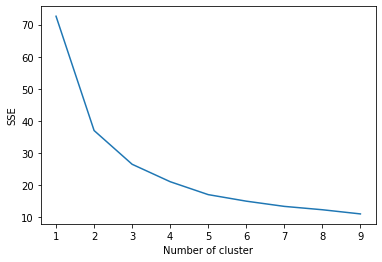

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#from sklearn.cluster import KMeans
#wcss=[]


#for i in range(1,11):
#    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
#    kmeans.fit(normalized_df)
#    wcss.append(kmeans.inertia_)

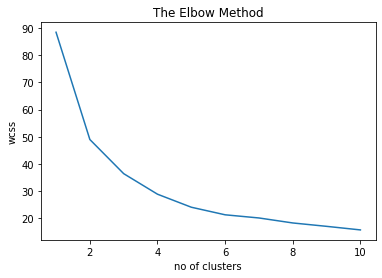

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
#plt.plot(range(1,11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('no of clusters')
#plt.ylabel('wcss')
#plt.show()

In [ ]:
#Model Build
#kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
#y_kmeans= kmeansmodel.fit_predict(normalized_df)

In [ ]:
#Visualizing all the clusters 

#plt.scatter(normalized_df[y_kmeans == 0, 0], normalized_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
#plt.scatter(normalized_df[y_kmeans == 1, 0], normalized_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
#plt.title('Clusters of customers')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
#plt.legend()
#plt.show()

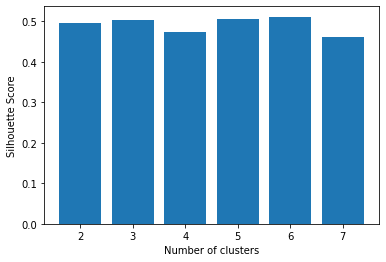

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

optimal cluster 5

In [ ]:
kmeans = KMeans(n_clusters= 6)
kmeans.fit(normalized_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(normalized_df)

# Add cluster number to the original data

normalized_df['cluster'] = clusters

normalized_df.head()

,AGE,BANGALORE(Y/N),CITY/STATE/COUNTRY,NRI / NON NRI,NO OF BOOKING,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,cluster
0,0.070643,0.039423,-0.020562,-0.012458,-0.032234,0.0,-0.027865,-0.028958,0.0,-0.029593,0.984172,0.0,-0.066553,-0.062022,-0.065001,-0.062542,-0.065890,0
1,-0.412675,0.220285,-0.114893,-0.069611,-0.180116,0.0,-0.155704,-0.161808,0.0,-0.165360,-0.070102,0.0,-0.371884,-0.346562,-0.363208,-0.349467,-0.368175,1
2,-0.155677,0.238913,-0.124609,-0.075498,-0.195347,0.0,-0.168871,-0.175491,0.0,-0.179343,-0.074765,0.0,-0.403331,-0.375868,-0.393921,-0.379019,-0.399308,1
3,-0.610139,0.141338,-0.073717,-0.044664,-0.115565,0.0,-0.099902,-0.103818,0.0,-0.106097,-0.044957,0.0,0.348731,0.316692,0.336216,0.177370,0.431887,2
4,-0.058991,0.241418,-0.125915,-0.076289,-0.197395,0.0,-0.170642,-0.177331,0.0,-0.181223,-0.076791,0.0,-0.407559,-0.379808,-0.398051,-0.382992,-0.403495,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(encode_data),columns = encode_data.columns)
df_scaled['kmeans'] = kmeans.labels_
df_mean = (df_scaled.loc[: , :]
                    .groupby('kmeans').mean())

print(df_mean)

             AGE  BANGALORE(Y/N)  CITY/STATE/COUNTRY  NRI / NON NRI  \
kmeans                                                                
0       0.482143           0.875                0.25           0.00   
1       0.199405           1.000                0.20           0.00   
2       0.244898           1.000                0.20           0.00   
3       0.400000           0.000                0.08           0.00   
4       0.417989           1.000                0.20           0.00   
5       0.172619           0.250                0.85           0.25   

        NO OF BOOKING  multiple complex  FLAT/PLOT  TYPE OF FLAT  PLOT(Y/N)  \
kmeans                                                                        
0              0.5625               0.0   0.333333        0.3750        0.0   
1              0.0000               0.0   0.000000        0.0000        0.0   
2              0.0000               0.0   0.000000        0.0000        0.0   
3              0.0000               

In [ ]:
df1['cluster'] = clusters
df1

,AGE,BANGALORE(Y/N),CITY/STATE/COUNTRY,NRI / NON NRI,NO OF BOOKING,multiple complex,FLAT/PLOT,TYPE OF FLAT,PLOT(Y/N),NO OF PLOTS,TOTAL UNIT COST,YEAR BUCKET,RELIGION SORTED,CATEGORY SORTED,CASTE SORTED,LANGUAGE,COMMUNITY,Unnamed: 17,cluster
0,41.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,181718.25000,YR_1,NaN,NaN,NaN,NaN,NaN,NaN,0
1,32.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14585.66667,YR_1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,35.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14621.00000,YR_1,NaN,NaN,NaN,NaN,NaN,NaN,1
3,26.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,Hindu,General,OtherLIst,Hindi,Kayastha,NaN,2
4,NaN,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,NaN,NaN,NaN,NaN,NaN,NaN,1
5,66.0,Y,BANGALORE,NO,2,No,"PLOT,PLOT","Plot -,Plot -",Y,2,14588.00000,YR_1,OtherList,OtherList,OtherList,OtherLanguage,OtherList,NaN,0
6,32.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,NaN,NaN,NaN,NaN,NaN,NaN,1
7,29.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.00000,YR_1,NaN,NaN,NaN,NaN,NaN,NaN,1
8,37.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.33333,YR_1,Sikh,General,Punjabi,Punjabi,Punjabi,NaN,2
9,55.0,Y,BANGALORE,NO,1,No,PLOT,Plot -,Y,1,14587.66667,YR_1,NaN,NaN,NaN,NaN,NaN,NaN,4


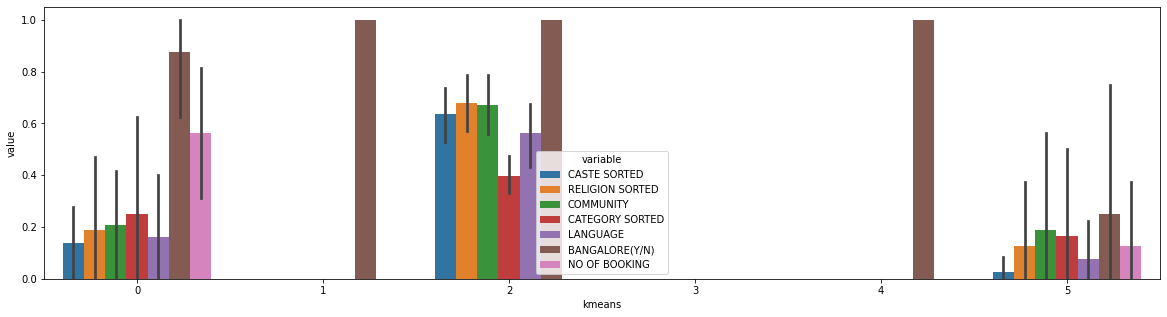

In [ ]:
plt.figure(figsize=(20,5))

results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(normalized_df[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['kmeans']
tidy = df_scaled[selected_columns].melt(id_vars='kmeans')
sns.barplot(x='kmeans', y='value', hue='variable', data=tidy)

In [ ]:
normalized_df['NRI / NON NRI'].unique()

array([-0.01229675, -0.06650085, -0.07151785, -0.04066902, -0.05451476,
       -0.01483555, -0.06650099, -0.05914939, -0.02400155, -0.03607315,
       -0.0665066 , -0.07151244, -0.05915008, -0.04219584, -0.0239982 ,
       -0.06430534, -0.02326972, -0.06170748, -0.02385523, -0.02367727,
       -0.06085882, -0.07221013, -0.07151419, -0.06417787, -0.06856805,
        0.89731183, -0.03178103, -0.03114129, -0.02990897, -0.06270877,
       -0.07220223, -0.04554078, -0.06430368, -0.02368899, -0.02417313,
       -0.0655661 , -0.0643038 , -0.05914949, -0.04630609, -0.0641785 ,
       -0.05914969, -0.02423934, -0.04552861, -0.06642669, -0.0325397 ,
       -0.0430917 , -0.06556678, -0.04979194, -0.02376468, -0.00975258,
       -0.06650212, -0.05233417, -0.04400595, -0.06683493, -0.04888462,
       -0.06683393, -0.05883223, -0.06857068, -0.0321862 , -0.02164052,
       -0.06430787, -0.06086248, -0.02240291, -0.023523  , -0.07151279,
       -0.03925969, -0.04713837, -0.01718649, -0.04810683, -0.02

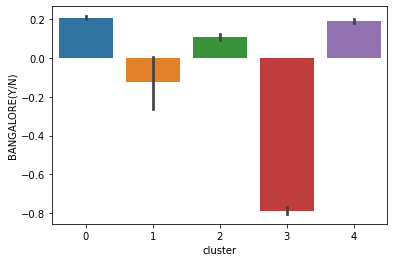

In [ ]:
sns.barplot(normalized_df['cluster'],normalized_df['BANGALORE(Y/N)'])

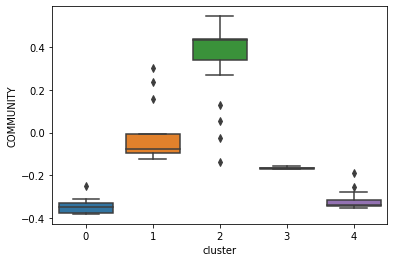

In [ ]:
sns.boxplot(normalized_df['cluster'],normalized_df['COMMUNITY'])

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
print(df)

     AGE  BANGALORE(Y/N)  CITY/STATE/COUNTRY  NRI / NON NRI  NO OF BOOKING  \
0   41.0               1                   1              0              1   
1   32.0               1                   1              0              1   
2   35.0               1                   1              0              1   
3   26.0               1                   1              0              1   
4    NaN               1                   1              0              1   
5   66.0               1                   1              0              2   
6   32.0               1                   1              0              1   
7   29.0               1                   1              0              1   
8   37.0               1                   1              0              1   
9   55.0               1                   1              0              1   
10  32.0               1                   1              0              1   
11  32.0               1                   1              0     

In [ ]:
#############

c = df1['COMMUNITY'].astype('category')

d = dict(enumerate(c.cat.categories))
print (d)


{0: '(NorthIndia)Himachal,Rajasthan,Uttarakhand,U.P,Delhi', 1: '0', 2: 'AndraPradesh,Bengal', 3: 'Baniya', 4: 'Bengali', 5: 'BengaliGandhabanik', 6: 'Kayastha', 7: 'Landowners', 8: 'MerchantCommunity', 9: 'OtherList', 10: 'Punjabi', 11: 'Rajasthani'}


In [ ]:
c = df1['TYPE OF FLAT'].astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'Plot -', 1: 'Plot -,Plot -', 2: 'Plot -,Plot -,2 BHK', 3: 'Plot -,Plot -,Plot -', 4: 'plot -'}


In [ ]:
c = df1['NRI / NON NRI'].astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'NO', 1: 'YES'}


In [ ]:
c = df1['CITY/STATE/COUNTRY'].astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'ANDHRA PRADESH', 1: 'BANGALORE', 2: 'PRADESH', 3: 'TAMIL NADU', 4: 'UAE', 5: 'WEST BENGAL'}


In [ ]:
c = df1['BANGALORE(Y/N)'].astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'N', 1: 'Y'}


In [ ]:
c = df['cluster'].astype('category')

d = dict(enumerate(c.cat.categories))
print(d)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [ ]:
df1['code'] = df1['COMMUNITY'].astype('category').cat.codes

df1['level_back'] = df1['code'].map(d)
print (df1)

df1.to_csv("BANGALORE6.csv")

     AGE BANGALORE(Y/N) CITY/STATE/COUNTRY NRI / NON NRI  NO OF BOOKING  \
0   41.0              Y          BANGALORE            NO              1   
1   32.0              Y          BANGALORE            NO              1   
2   35.0              Y          BANGALORE            NO              1   
3   26.0              Y          BANGALORE            NO              1   
4    NaN              Y          BANGALORE            NO              1   
5   66.0              Y          BANGALORE            NO              2   
6   32.0              Y          BANGALORE            NO              1   
7   29.0              Y          BANGALORE            NO              1   
8   37.0              Y          BANGALORE            NO              1   
9   55.0              Y          BANGALORE            NO              1   
10  32.0              Y          BANGALORE            NO              1   
11  32.0              Y          BANGALORE            NO              1   
12  35.0              Y  